In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving Astana NUSRP.rar to Astana NUSRP.rar


In [2]:
!apt install unrar -y
import os
import glob
from io import BytesIO

rar_filename = list(uploaded.keys())[0]
extract_path = "unzipped_folder"
os.makedirs(extract_path, exist_ok=True)
!unrar x -y "{rar_filename}" {extract_path}/
excel_files = sorted(glob.glob(f"{extract_path}/*.xlsx"))
all_data = []
for file in excel_files:
    df = pd.read_excel(file)
    all_data.append(df)

combined_df = pd.concat(all_data, ignore_index=True)
output_filename = "combined_output.xlsx"
combined_df.to_excel(output_filename, index=False)
files.download(output_filename)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from Astana NUSRP.rar

Extracting  unzipped_folder/METEOROLOGICAL DATABASE.xlsx                   2%  OK 
Extracting  unzipped_folder/METEOROLOGICAL DATABASE (34).xlsx              5%  OK 
Extracting  unzipped_folder/METEOROLOGICAL DATABASE (33).xlsx              8%  OK 
Extracting  unzipped_folder/METEOROLOGICAL DATABASE (32).xlsx             10%  OK 
Extracting  unzipped_folder/METEOROLOGICAL DATABASE (31).xlsx             13%  OK 
Extracting  unzipped_folder/METEOROLOGICAL DATABASE (30).xlsx             16%  OK 
Extracting  unzipped_folder/METEOROLOGICAL DATABASE (29).xlsx             19%  OK 
Extracting  unzipped_folder

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
import pandas as pd

df = pd.read_excel("/content/combined_output.xlsx")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
periods = [
    ("2000-01-01", "2004-12-31"),
    ("2005-01-01", "2009-12-31"),
    ("2010-01-01", "2014-12-31"),
    ("2015-01-01", "2019-12-31"),
    ("2020-01-01", "2025-03-31")
]
for start, end in periods:
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    sub = df[(df['Date'] >= start) & (df['Date'] <= end)]
    filename = f"data_{start.year}_{end.year}.xlsx"
    sub.to_excel(filename, index=False)

    print(f"Saved: {filename} — {len(sub)} rows =)")


Saved: data_2000_2004.xlsx — 1827 rows =)
Saved: data_2005_2009.xlsx — 1826 rows =)
Saved: data_2010_2014.xlsx — 1826 rows =)
Saved: data_2015_2019.xlsx — 1826 rows =)
Saved: data_2020_2025.xlsx — 1917 rows =)


In [47]:
df1 = pd.read_excel("data_2000_2004.xlsx")
df2 = pd.read_excel("data_2005_2009.xlsx")
df3 = pd.read_excel("data_2010_2014.xlsx")
df4 = pd.read_excel("data_2015_2019.xlsx")
df5 = pd.read_excel("data_2020_2025.xlsx")

In [51]:
df1['Degree of coverage.'] = df1['Degree of coverage.'].fillna(0)
df1['Height, cm'] = pd.to_numeric(df1['Height, cm'], errors='coerce').fillna(0)
print("\nStatistics 2000-2004:")
print(df1[['Degree of coverage.', 'Height, cm']].describe())

df2['Degree of coverage.'] = df2['Degree of coverage.'].fillna(0)
df2['Height, cm'] = pd.to_numeric(df2['Height, cm'], errors='coerce').fillna(0)
print("\nStatistics 2005-2009:")
print(df2[['Degree of coverage.', 'Height, cm']].describe())

df3['Degree of coverage.'] = df3['Degree of coverage.'].fillna(0)
df3['Height, cm'] = pd.to_numeric(df3['Height, cm'], errors='coerce').fillna(0)
print("\nStatistics 2010-2014:")
print(df3[['Degree of coverage.', 'Height, cm']].describe())

df4['Degree of coverage.'] = df4['Degree of coverage.'].fillna(0)
df4['Height, cm'] = pd.to_numeric(df4['Height, cm'], errors='coerce').fillna(0)
print("\nStatistics 2015-2019:")
print(df4[['Degree of coverage.', 'Height, cm']].describe())

df5['Degree of coverage.'] = df5['Degree of coverage.'].fillna(0)
df5['Height, cm'] = pd.to_numeric(df5['Height, cm'], errors='coerce').fillna(0)
print("\nStatistics 2020-2025:")
print(df5[['Degree of coverage.', 'Height, cm']].describe())


Statistics 2000-2004:
       Degree of coverage.   Height, cm
count          1827.000000  1827.000000
mean              3.987411     6.615216
std               4.790845    10.272585
min               0.000000     0.000000
25%               0.000000     0.000000
50%               0.000000     0.000000
75%              10.000000    10.000000
max              10.000000    39.000000

Statistics 2005-2009:
       Degree of coverage.   Height, cm
count           1826.00000  1826.000000
mean               3.73713     4.019715
std                4.76263     6.029575
min                0.00000     0.000000
25%                0.00000     0.000000
50%                0.00000     0.000000
75%               10.00000     9.000000
max               10.00000    23.000000

Statistics 2010-2014:
       Degree of coverage.   Height, cm
count          1826.000000  1826.000000
mean              3.823658     6.877875
std               4.788984    10.666752
min               0.000000     0.000000
25%        

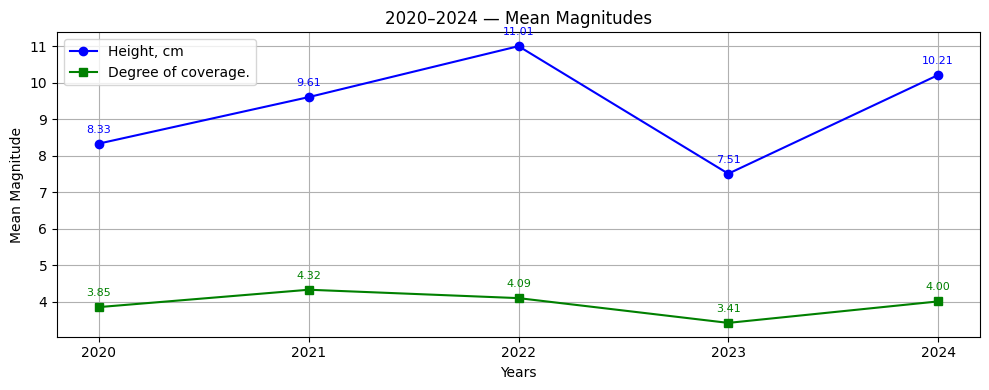

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

df5['Date'] = pd.to_datetime(df5['Date'], errors='coerce')
df5['Year'] = df5['Date'].dt.year
df5 = df5[df5['Year'] < 2025]

df5['Height, cm'] = pd.to_numeric(df5['Height, cm'], errors='coerce')
df5['Degree of coverage.'] = pd.to_numeric(df5['Degree of coverage.'], errors='coerce')
mean_df5 = df5.groupby('Year')[['Height, cm', 'Degree of coverage.']].mean()
plt.figure(figsize=(10, 4))

for col, marker, color in [('Height, cm', 'o', 'blue'), ('Degree of coverage.', 's', 'green')]:
    plt.plot(mean_df5.index, mean_df5[col], marker=marker, label=col, color=color)
    for x, y in zip(mean_df5.index, mean_df5[col]):
        plt.text(x, y + 0.3, f"{y:.2f}", ha='center', fontsize=8, color=color)

plt.xticks(ticks=mean_df5.index.astype(int))
plt.title("2020–2024 — Mean Magnitudes")
plt.xlabel("Years")
plt.ylabel("Mean Magnitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
